In [37]:
# Importando bibliotecas que vão ser utilizadadas para o tratamento, redução e visualização de alguns dados para tomada de decisão na escolha estratégica das variáveis de interesse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
pd.set_option('display.max_columns', None)
import os


In [38]:
# Lendo o arquivo que contem a base de dados e estruturando de acordo com a coluna tamanho
df = pd.read_csv('DATABASE/PNS_2019.csv', sep=';', low_memory=False)
df.head()


,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,V0025B,A001,A002010,A003010,A004010,A01001,A011,A005010,A005012,A00601,A009010,A01401,A01402,A01403,A01501,A016010,A018011,A018012,A018013,A018014,A018015,A018016,A018017,A018018,A018019,A018020,A018021,A018022,A018023,A018024,A018025,A018026,A018027,A018028,A01901,A02101,A02102,A02201,A02305,A02306,A02307,A02308,A02401,A02402,B001,B002,B003,B004,C001,C00301,C004,C006,C00701,C00702,C00703,C008,C009,C01001,C010010,C013,C014,C015,C016,C017,C018,C01801,C011,C012,D001,D00201,D00202,D00301,D00501,D006,D00601,D007,D008,D00901,D010,D01101,D01201,D01301,D01302,D01303,D014,D015,E001,E002,E003,E004,E005,E006011,E008,E010010,E010011,E010012,E010013,E011,E01201,E01401,E014011,E01402,E01403,E01501,E01601,E01602,E01603,E01604,E01605,E017,E01801,E01802,E01803,E01804,E01805,E019,E022,E023011,E024011,E02402,E024021,E025,E02501,E02502,E02503,E026,E02601,E02801,E02802,E02803,E02804,E02805,E02806,E030,E03101,E03102,E03103,E03104,E03105,E03106,E03107,E03108,E032,E033,E027,F001011,F001021,F007011,F007021,F008011,F008021,VDF001,VDF00102,F016,G033,G034,G035,G036,G038,G039,G040,G041,G042,G044,G046,G047,G048,G049,G050,G051,G052,G053,G054,G055,G057,G058,G05801,G059,G060,G061,G062,G063,G064,G065,G066,G067,G068,G070,G071,G072,G073,G074,G075,G076,G077,G079,G080,G081,G082,G083,G084,G085,G086,G032,I00101,I00102,I001021,I00103,I001031,I005,I006,I004,I00401,I00402,I00403,I00404,I010010,I012,J001,J00101,J002,J003,J00402,J00404,J005,J006,J007,J00801,J009,J01002,J01101,J012,J01301,J014,J01502,J01602,J01701,J01802,J019,J02002,J021,J022010,J023,J024,J025,J026,J02702,J02901,J03001,J03102,J032,J03301,J034,J035,J03602,J037,J038,J039,J04001,J04002,J041,J042,J043,J044,J046,J047,J048,J049,J051,J052,J05301,J05402,J05403,J05404,J05405,J05406,J05407,J05408,J05409,J054010,J056,J057,J060,K001,K004,K007,K010,K013,K016,K019,K01901,K02001,K02101,K02102,K022,K025,K028,K031,K034,K03401,K03501,K03601,K03602,K04301,K04302,K04401,K045,K046,K047,K048,K050,K051,K052,K05302,K05401,K05402,k055,K05601,K05602,K062,L01701,L01702,L01703,L01704,L01705,L01706,L01707,L01708,L01709,L01710,L01711,L01712,L01713,L01714,L01715,L01716,L018,L019,L021,L022,L023,L024,L025,L026,L027,L028,L029,L030,L031,L032,L033,L034,L035,L036,L037,L038,L039,L040,L042,M001,M002,M00203,M00302,M00303,M00401,M00402,M005010,M005011,M00601,M007,M008,M009,M01001,M011011,M011021,M011031,M011041,M011051,M011061,M011071,M01401,M01501,M01601,M01701,M01801,M01901,N001,N00101,N004,N005,N006,N00701,N008,N010,N011,N012,N013,N014,N015,N016,N017,N018,O00101,O00401,O00402,O00501,O00201,O00701,O00801,O00802,O00803,O009,O00901,O010,O01102,O01401,O01501,O01602,O01702,O019,O02001,O021,O02101,O02201,O023,O02401,P00102,P00103,P00104,P00201,P00402,P00403,P00404,P00405,P005,P00601,P00602,P00603,P00604,P00605,P00607,P00608,P00609,P00610,P00611,P00612,P00613,P00614,P00615,P00616,P00617,P00618,P00619,P00620,P00621,P00622,P00623,P006,P00901,P01001,P01101,P013,P015,P02001,P02101,P01601,P018,P019,P02002,P02102,P023,P02401,P02501,P02602,P02601,P027,P02801,P029,P03201,P03202,P03001,P03301,P03302,P03303,P034,P035,P03701,P03702,P036,P038,P039,P03904,P03905,P03906,P040,P04001,P04101,P04102,P042,P04301,P04302,P044,P04401,P04405,P04406,P04501,P04502,P046,P04701,P04801,P04902,P050,P051,P052,P053,P05401,P05402,P05403,P05404,P05405,P05406,P05407,P05408,P05409,P05410,P05411,P05412,P05413,P05414,P05415,P05416,P05417,P05418,P05419,P05421,P05422,P055,P056,P05601,P05602,P05603,P05604,P05605,P057,P058,P05801,P05802,P05901,P05902,P05903,P05904,P05905,P05906,P060,P06101,P06102,P06103,P06104,P06105,P06106,P06302,P067,P06701,P068,P069,P06901,P07004,P07005,P07006,P07007,P07101,P07201,Q00101,Q00201,Q00202,Q003,Q00401,Q00502,Q00503,Q00601,Q00602,Q00801,Q009,Q010,Q01101,Q01202,Q014,Q015,Q016,Q017,Q018010,Q018011,Q018012,Q018013,Q018014,Q018015,Q018016,Q018017,Q01910,Q019101,Q01911,Q019111,Q01912,Q019121,Q01913,Q019131,Q022,Q02301,Q026,Q02701,Q028,Q02901,Q03001,Q03002,Q031,Q03201,Q03302,Q03303,Q03403,Q03404,Q

In [39]:
# Verificando as informações do dataframe e os tipos de dados das colunas criadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Columns: 1087 entries, V0001 to VDDATA
dtypes: float64(1063), int64(9), object(15)
memory usage: 2.4+ GB


In [40]:
# Selecionando as variáveis de interesse e reduzindo a base
df = df[
   [
      'N00101',
      'N012',
      'P027',
      'P02801',
      'P029',
      'P03301',
      'P03303',
      'P03001',
      'P03302',
      'P03201',
      'Q10701',
      'Q109',
      'Q11006',
      'J00402',
      'N011',
      'N010',
      'N016',
      'N017',
      'N018',
      'Q092'
   ]
]

df.head()

,N00101,N012,P027,P02801,P029,P03301,P03303,P03001,P03302,P03201,Q10701,Q109,Q11006,J00402,N011,N010,N016,N017,N018,Q092
0,3.0,2.0,2.0,NaN,5.0,1.0,1.0,NaN,1.0,2.0,NaN,1.0,2.0,NaN,2.0,4.0,2.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
traducao = pd.read_json(os.getcwd() + '/DATABASE/Json/DD_Traducao.json')
traducao['Nomes Reduzidos']

J00402     Motivo impedimento atividade habitual últimas 2S
N00101                                      Estado de saúde
N010                                  Problemas para dormir
N011                                  Problemas com cansaço
N012                          Pouco Interesse em atividades
N016                                  Sentimento depressivo
N017                                 Sentimento de fracasso
N018                                        Ideação suicida
P027                        Frequência de consumo de bebida
P02801                         Qtde dias na semana que bebe
P029                                 Qtde doses quando bebe
P03001                   Dirigir embriagado nos últimos 12M
P03201       Mais de 5 doses em uma ocasião nos últimos 30D
P03301    Qtde faltas no trabalho por bebida nos últimos...
P03302          Falta de memória após beber nos últimos 12M
P03303                             Aviso bebida últimos 12M
Q092                               Diagn

In [42]:
df.head()

,N00101,N012,P027,P02801,P029,P03301,P03303,P03001,P03302,P03201,Q10701,Q109,Q11006,J00402,N011,N010,N016,N017,N018,Q092
0,3.0,2.0,2.0,NaN,5.0,1.0,1.0,NaN,1.0,2.0,NaN,1.0,2.0,NaN,2.0,4.0,2.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Renomeando as colunas
df = df.rename(columns=traducao['Nomes Reduzidos'])

In [44]:
def Heatmap(df):
   # Defina as cores personalizadas para ausência e presença de dados
   colors = ["#77BA99", "#FAFAF0"]

   # Definindo as cores do Heatmap
   cmap = sns.color_palette(colors)

   #Colocando o gráfico em horizontal
   df_transposto = df.T

   # Criando o mapa
   grafico = sns.heatmap(
      df_transposto.isnull(),
      yticklabels = True,
      xticklabels = False,
      cbar = False,
      cmap = cmap
   )

   # grafico.set_title(
   #    "Heatmap da Ausência e Presença de Dados no Dataset",
   #    fontsize = 12,
   #    fontname = "serif",
   #    horizontalalignment = 'center'
   # )

   # Crie a legenda personalizada com quadradinhos coloridos
   legend_labels = ["Presença", "Ausência"]
   legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
   grafico.legend(legend_patches, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.02), ncol=2, title="Legenda")


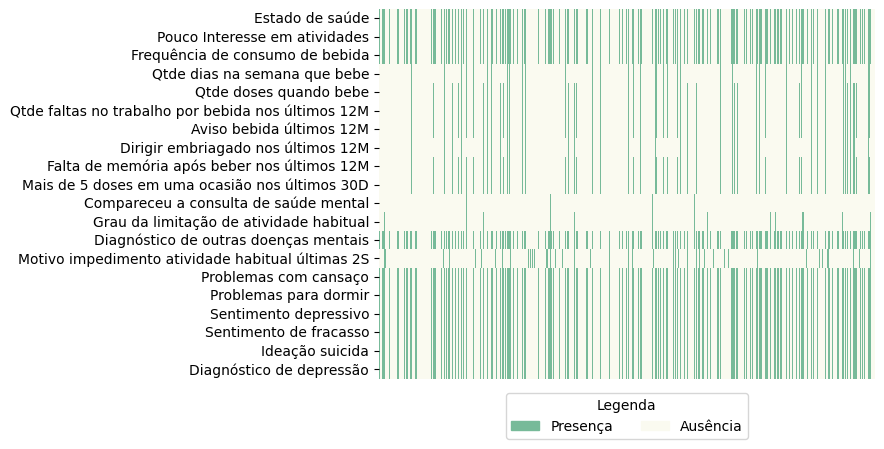

In [45]:
Heatmap(df)

In [46]:
# Converte colunas para número flutuante
df = df.astype(float)
df.dtypes

Estado de saúde                                       float64
Pouco Interesse em atividades                         float64
Frequência de consumo de bebida                       float64
Qtde dias na semana que bebe                          float64
Qtde doses quando bebe                                float64
Qtde faltas no trabalho por bebida nos últimos 12M    float64
Aviso bebida últimos 12M                              float64
Dirigir embriagado nos últimos 12M                    float64
Falta de memória após beber nos últimos 12M           float64
Mais de 5 doses em uma ocasião nos últimos 30D        float64
Compareceu a consulta de saúde mental                 float64
Grau da limitação de atividade habitual               float64
Diagnóstico de outras doenças mentais                 float64
Motivo impedimento atividade habitual últimas 2S      float64
Problemas com cansaço                                 float64
Problemas para dormir                                 float64
Sentimen

In [47]:
# # Atualizando a idade das pessoas para o ano de 2023
# df['Idade'] = df['Idade'] + 4.0
# df['Idade']

In [48]:
# Pessoas que tiveram diagnóstico de depressão: 1.0, Pessoas que não tiveram: 2.0
counts = df['Diagnóstico de depressão'].value_counts()
counts

2.0    82514
1.0     8332
Name: Diagnóstico de depressão, dtype: int64

In [49]:
# Filtros para buscar possível diagnóstico de não depressão

# Condição 1: Diagnóstico de depressão é nulo ou igual a 2.0
condicao1 = df['Diagnóstico de depressão'].isin([None, 2.0])

# Condição 2: Consumo de álcool é 1.0 ou 2.0
condicao2 = df['Frequência de consumo de bebida'].isin([1.0, 2.0])

# Condição 3: Sentimento depressivo é 1.0 ou 2.0
condicao3 = df['Sentimento depressivo'].isin([1.0, 2.0])

# Condição 4: Estado de saúde é igual a 1.0
condicao4 = df['Estado de saúde'] == 1.0

# Condição 5: Motivo de impedimento não é igual a 12.0
condicao5 = df['Motivo impedimento atividade habitual últimas 2S'] != 12.0

# Aplicando todas as condições de filtros para obter o DataFrame final
df_possivel_sem_depressao = df.loc[condicao1 & condicao2 & condicao3 & condicao4 & condicao5]

df_possivel_sem_depressao.shape

(8444, 20)

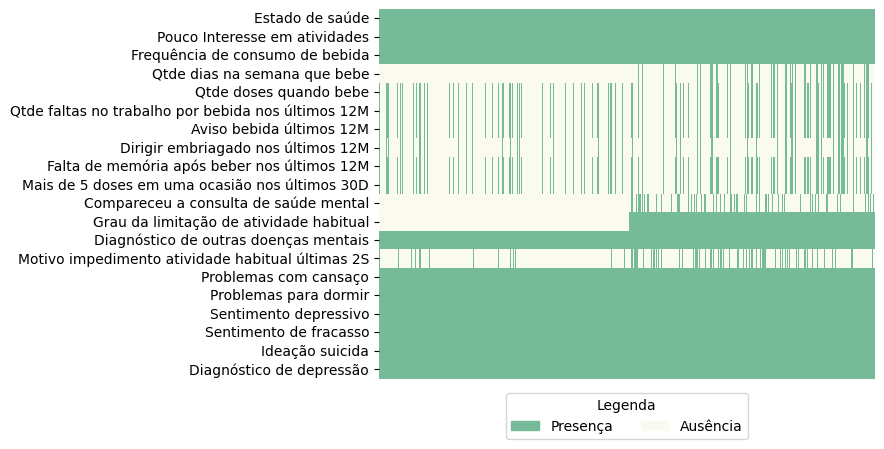

In [50]:
# Juntando dados de depressão e não depressão
condicao = df['Diagnóstico de depressão'] == 1.0
df_so_depressao = df.loc[condicao]

df_tratado = pd.concat([df_possivel_sem_depressao, df_so_depressao], axis=0)
Heatmap(df_tratado)

In [51]:
# Criando um DataFrame que nos dá o diagnóstico de alcoolismo
condicoes_homem = (
    ((df_tratado['Frequência de consumo de bebida'] == 3.0) & (df_tratado['Qtde doses quando bebe'] >= 15.0)) |
    ((df_tratado['Frequência de consumo de bebida'] == 3.0) & (df_tratado['Mais de 5 doses em uma ocasião nos últimos 30D'] == 1.0)) |
    ((df_tratado['Falta de memória após beber nos últimos 12M'].isin([3.0, 4.0, 5.0])) & (df_tratado['Qtde doses quando bebe'] >= 15.0))
)

condicoes_mulher = (
    ((df_tratado['Frequência de consumo de bebida'] == 3.0) & (df_tratado['Qtde doses quando bebe'] >= 8.0)) |
    ((df_tratado['Frequência de consumo de bebida'] == 3.0) & (df_tratado['Mais de 5 doses em uma ocasião nos últimos 30D'] == 1.0)) |
    ((df_tratado['Falta de memória após beber nos últimos 12M'].isin([3.0, 4.0, 5.0])) & (df_tratado['Qtde doses quando bebe'] >= 8.0))
)

df_tratado['Diagnóstico de alcoolismo'] = np.where(condicoes_homem | condicoes_mulher, 1, 0)

df_tratado['Diagnóstico de alcoolismo'] = df_tratado['Diagnóstico de alcoolismo'].astype(float)

counts = df_tratado['Diagnóstico de alcoolismo'].value_counts()
counts


0.0    15967
1.0      809
Name: Diagnóstico de alcoolismo, dtype: int64

In [52]:
counts = df_tratado['Diagnóstico de depressão'].value_counts()
counts

2.0    8444
1.0    8332
Name: Diagnóstico de depressão, dtype: int64

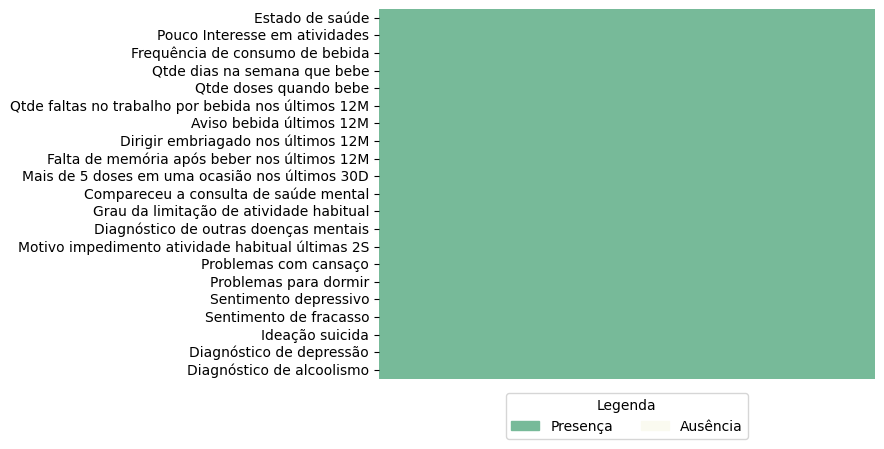

In [53]:
df_tratado.fillna(0, inplace=True)
Heatmap(df_tratado)


In [54]:
df_tratado

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,Aviso bebida últimos 12M,Dirigir embriagado nos últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,Compareceu a consulta de saúde mental,Grau da limitação de atividade habitual,Diagnóstico de outras doenças mentais,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo
57,1.0,1.0,2.0,0.0,3.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
59,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
61,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
65,1.0,1.0,2.0,0.0,4.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
94,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293584,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0
293610,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
293629,3.0,2.0,3.0,0.0,3.0,1.0,1.0,2.0,1.0,2.0,0.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0
293694,3.0,3.0,3.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,1.0,1.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0


In [55]:
ordenacao = ['Estado de saúde', 'Pouco Interesse em atividades', 'Frequência de consumo de bebida',
       'Qtde dias na semana que bebe', 'Qtde doses quando bebe',
       'Qtde faltas no trabalho por bebida nos últimos 12M',
       'Aviso bebida últimos 12M', 'Dirigir embriagado nos últimos 12M',
       'Falta de memória após beber nos últimos 12M',
       'Mais de 5 doses em uma ocasião nos últimos 30D',
       'Compareceu a consulta de saúde mental',
       'Grau da limitação de atividade habitual',
       'Diagnóstico de outras doenças mentais',
       'Motivo impedimento atividade habitual últimas 2S',
       'Problemas com cansaço', 'Problemas para dormir',
       'Sentimento depressivo', 'Sentimento de fracasso', 'Ideação suicida',
       'Diagnóstico de alcoolismo', 'Diagnóstico de depressão']

In [56]:
df_depressao_e_alcoolismo = ((df_tratado['Diagnóstico de depressão'] == 1.0) & (df_tratado['Diagnóstico de alcoolismo'] >= 1.0)) 

In [57]:
df_tratado ['Alcoolismo e Depressão']= ((df_tratado['Diagnóstico de depressão'] == 1.0) & (df_tratado['Diagnóstico de alcoolismo'] >= 1.0)) 

In [58]:
a = df_tratado['Alcoolismo e Depressão'].value_counts()
a

False    15969
True       807
Name: Alcoolismo e Depressão, dtype: int64

In [59]:
df_tratado['Alcoolismo e Depressão'] = df_tratado['Alcoolismo e Depressão'].replace({True: 1.0, False: 0.0})

In [60]:
# Suponha que 'df_tratado' é o seu DataFrame
zeros = df_tratado[df_tratado['Alcoolismo e Depressão'] == 0].index
uns = df_tratado[df_tratado['Alcoolismo e Depressão'] == 1].index

# Se houver mais dois do que uns
if len(zeros) > len(uns):
    # Escolha aleatoriamente índices de 'zeros' até que o número de zeros seja igual ao número de uns
    drop_indices = np.random.choice(zeros, size=len(zeros) - len(uns), replace=False)

    # Remova as linhas com os índices escolhidos
    df_tratado = df_tratado.drop(drop_indices)

In [61]:
df_tratado

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,Aviso bebida últimos 12M,Dirigir embriagado nos últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,Compareceu a consulta de saúde mental,Grau da limitação de atividade habitual,Diagnóstico de outras doenças mentais,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
1128,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0
1564,1.0,1.0,2.0,0.0,12.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,4.0,1.0,1.0,1.0,2.0,0.0,0.0
2963,1.0,1.0,2.0,0.0,10.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0
3248,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0
4257,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293004,1.0,2.0,3.0,4.0,5.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
293025,4.0,3.0,3.0,0.0,5.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0
293066,1.0,1.0,3.0,0.0,10.0,1.0,1.0,2.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
293255,2.0,2.0,3.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0


In [62]:
df_tratado['Diagnóstico de depressão'] = df_tratado['Diagnóstico de depressão'].replace(2, 0)

In [63]:
# Salvando arquivo reduzido como csv
df_tratado.to_csv(os.getcwd() + '/DATABASE/base-reduzida-v4.csv', sep=',', encoding='utf-8')